# Problem Statement:

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.shape

(50, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.rename(columns={'Unnamed: 0':'City'},inplace=True)
data.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
data = data.drop(columns=['City'])  # Drop city names for clustering

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Hierarchical Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 3  # Choose appropriate number of clusters
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

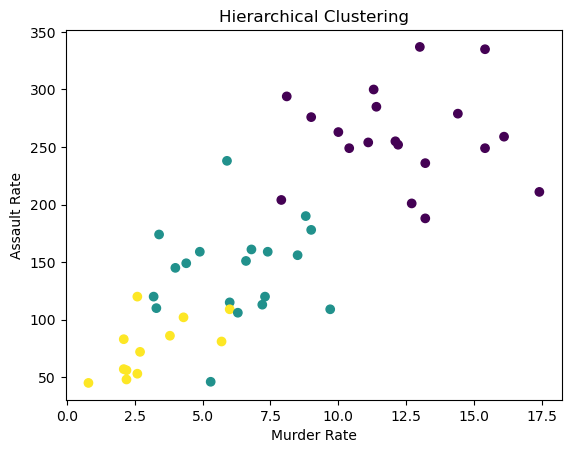

In [12]:
plt.scatter(data['Murder'], data['Assault'], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate')
plt.show()

In [13]:
data['Hierarchical_Cluster'] = hierarchical_labels
data['Hierarchical_Cluster'].value_counts()

0    19
1    19
2    12
Name: Hierarchical_Cluster, dtype: int64

# KMeans clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
num_clusters = 3  # Choose appropriate number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


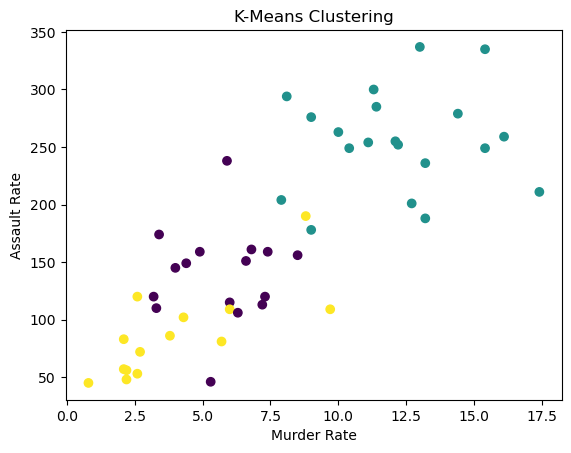

In [16]:
plt.scatter(data['Murder'], data['Assault'], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate')
plt.show()

In [17]:
data['KMeans_Cluster'] = kmeans_labels
data['KMeans_Cluster'].value_counts()

1    20
0    16
2    14
Name: KMeans_Cluster, dtype: int64

# DBSCAN clustering

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

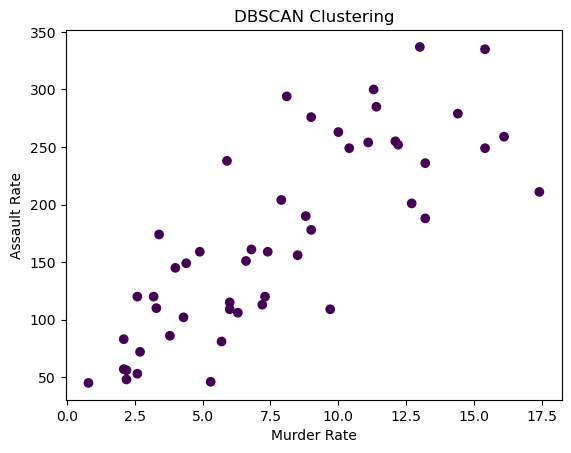

In [20]:
plt.scatter(data['Murder'], data['Assault'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Murder Rate')
plt.ylabel('Assault Rate')
plt.show()